In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import shuffle

In [26]:
import pandas as pd
phishing = pd.read_excel("phishing  url.xlsx")
phishing.head(10)

,URL,Label,Protocol
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,UDP
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,UDP
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,UDP
3,mail.printakid.com/www.online.americanexpress....,bad,UDP
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,UDP
5,smilesvoegol.servebbs.org/voegol.php,bad,UDP
6,premierpaymentprocessing.com/includes/boleto-2...,bad,UDP
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,bad,UDP
8,super1000.info/docs,bad,UDP
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,bad,UDP


In [27]:
phishing.tail()

,URL,Label,Protocol
3884,'iboon.org/iboon\%20paypal.htm',good,ftp
3885,nail-service.com/loreal.files/redirect.php,good,sftp
3886,savageranch.com/portal/ativar/plugin/BancodoBr...,good,Http
3887,'savageranch.com/portal/bnzonlineaccess/accoun...,good,Https
3888,giveu.asadal.com/GoodMatch/SARS.html,good,Http


In [28]:
print(phishing.shape)

(3889, 3)


In [29]:
phishing.Label.value_counts()

Label
bad     2676
good    1213
Name: count, dtype: int64

In [30]:
phishing.Protocol.value_counts()

Protocol
ICMP           1524
tcp             696
TCP             561
UDP             476
http            166
udp             116
SSH-Patator     113
SNMP             52
icmp             43
Telnet           38
Dns              27
imap             18
pop3             16
smtp             15
Http             10
Https             7
ftp               4
RDP               3
sftp              3
snmp              1
Name: count, dtype: int64

In [31]:
phishing.URL.value_counts()

URL
nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526    1
www.netofficials.com/media/system/propertiesremax.html                                                                                                                                                                               1
bit.ly/LIg5jj?=fidel03921039                                                                                                                                                                                                         1
bit.ly/NheAvN?=3Dfide98239382                                                                                                                                                                                                        1
credit-habbo-gratos.yolasite.com/contact-us.php                         

In [32]:
phishing.isnull().sum()

URL         0
Label       0
Protocol    0
dtype: int64

In [33]:
phishing.dropna(inplace=True)

In [34]:
phishing.isnull().sum()

URL         0
Label       0
Protocol    0
dtype: int64

In [35]:
phishing.duplicated().sum()

0

In [36]:
phishing.isna().sum()

URL         0
Label       0
Protocol    0
dtype: int64

In [37]:
phishing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3889 entries, 0 to 3888
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URL       3889 non-null   object
 1   Label     3889 non-null   object
 2   Protocol  3889 non-null   object
dtypes: object(3)
memory usage: 91.3+ KB


In [38]:
phishing.describe()

,URL,Label,Protocol
count,3889,3889,3889
unique,3889,2,20
top,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,ICMP
freq,1,2676,1524


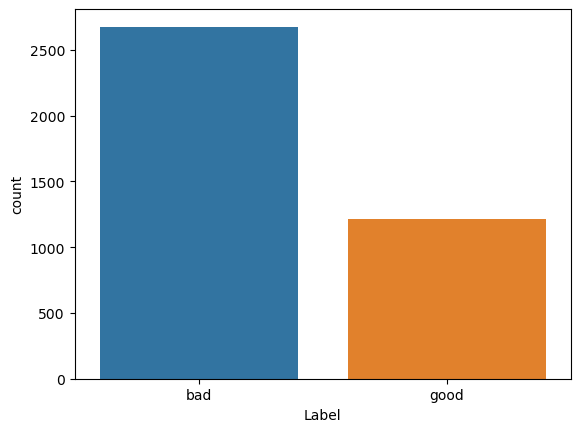

In [39]:
sns.countplot(data=phishing, x="Label")
plt.show()

In [40]:
df_shuffled = shuffle(phishing, random_state=42)

In [41]:
data_size = 5000

In [42]:
phishing_url = df_shuffled[:data_size].copy()

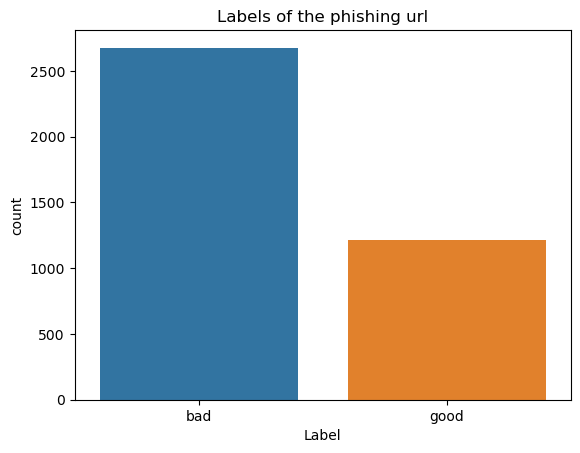

In [43]:
sns.countplot(data=phishing_url, x="Label")
plt.title("Labels of the phishing url")

plt.show()

In [44]:
phishing_url.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3889 entries, 2392 to 3174
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URL       3889 non-null   object
 1   Label     3889 non-null   object
 2   Protocol  3889 non-null   object
dtypes: object(3)
memory usage: 121.5+ KB


In [45]:
phishing_url.replace({'good':0, 'bad':1}, inplace=True)

In [46]:
phishing_url.Label.value_counts()

Label
1    2676
0    1213
Name: count, dtype: int64

In [47]:
phishing_url.replace({'ICMP':0, 'TCP':1,'UDP':2,'http':3}, inplace=True)

In [48]:
phishing_url.Protocol.value_counts()

Protocol
0              1524
tcp             696
1               561
2               476
3               166
udp             116
SSH-Patator     113
SNMP             52
icmp             43
Telnet           38
Dns              27
imap             18
pop3             16
smtp             15
Http             10
Https             7
ftp               4
RDP               3
sftp              3
snmp              1
Name: count, dtype: int64

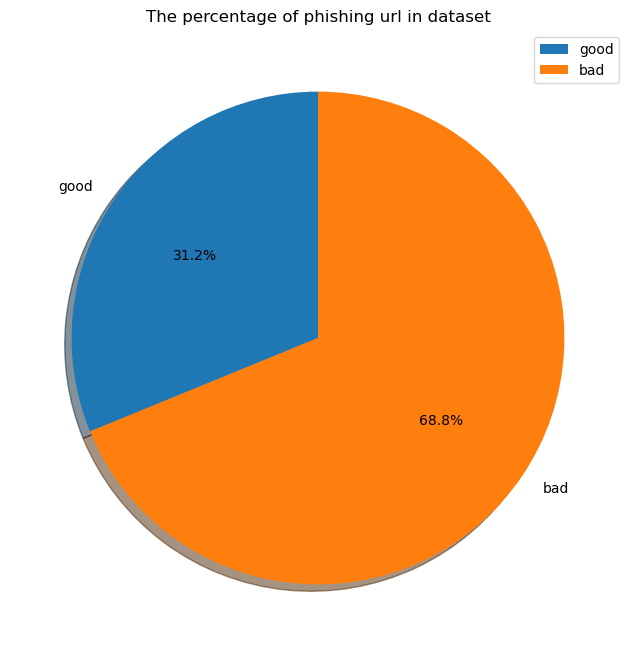

In [49]:
labels = ["good",'bad']
sizes = [dict(phishing_url.Label.value_counts())[0], dict(phishing_url.Label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["good",'bad'])
plt.title('The percentage of phishing url in dataset')
plt.show()

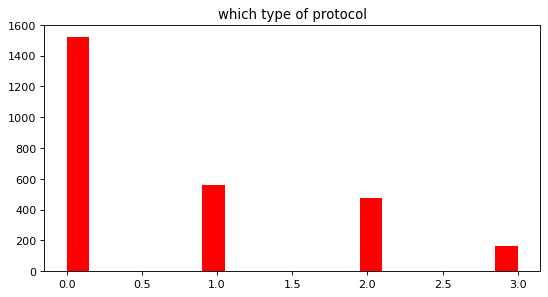

In [50]:
phishing_url['Protocol'] = pd.to_numeric(phishing_url['Protocol'], errors='coerce')
plt.figure(figsize=(8, 4), dpi=80)
plt.hist(phishing_url.Protocol, bins=20, color='r')
plt.title('which type of protocol')
plt.show()

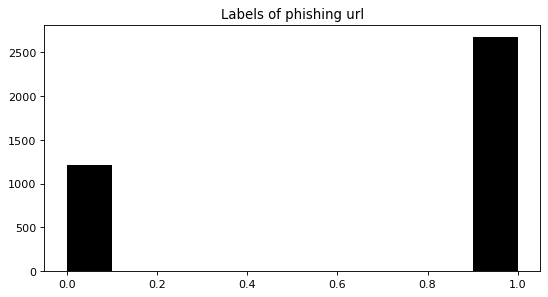

In [51]:
plt.figure(figsize=(8, 4), dpi=80)
plt.hist(phishing_url.Label, bins=10, color='k')
plt.title('Labels of phishing url')
plt.show()